Load packages and scripts

In [5]:
# Load packages
import sys
import pandas as pd
from matplotlib import pyplot as plt

# Load local scripts
# Add scripts folder to sys.path so scripts can be imported
sys.path.insert(1, 'scripts')
from scripts.data_functions import load_ecg_data,addDamicAdmissionData
from scripts.visualisation import plot_ecgs_per_location, plot_ecgs_at_ICU, plot_ecgs_per_year

# ============= #
# Load ECG data #
# ============= #

# Set quickload to True if you only want to quickly read the ECG metadata.
# Set quickload to False if you want to load all ECG data including the
# waveform data (this can take multiple hours).
quickload = True
makePlots = True # Set to True for overview plots
save = False

# Specify folder directories
data_path = r"L:/SPEC/ICU/RESEARCH/Data-onderzoek/ECG dataset/data"
local_ecg_path = r"L:/SPEC/ICU/RESEARCH/Data-onderzoek/ECG dataset/XML subset"
figure_path = "figures"

Run quickload and make plots

In [2]:
if quickload:
    df_ecg = load_ecg_data(data_path = data_path,
                           quickload = quickload)
else:
    load_ecg_data(local_ecg_path = local_ecg_path, quickload = quickload)

# =============== #
# Add DAM-IC data #
# =============== #
# Load DAM-IC data
mostRecentDamicFile = r"L:\SPEC\ICU\RESEARCH\Data-onderzoek\Basisdataset\DAM-IC\Definitief cohort versies\ADAMICPatientCohort_HrCorrected2013-2023_hashed_2024-10-15.csv"
df_ecg=addDamicAdmissionData(df_ecg, mostRecentDamicFile)

if save:
    df_ecg.to_csv(r"L:\SPEC\ICU\RESEARCH\Data-onderzoek\Basisdataset\DAM-IC\Definitief cohort versies\DAMIC_ECG_metadata_xx-xx-2025.csv")

# ============== #
# Visualise data #
# ============== #
if makePlots:
    plot_ecgs_per_location(df_ecg, save = save, save_path = figure_path)

    plot_ecgs_at_ICU(df_ecg, save = save, save_path = figure_path)

    plot_ecgs_per_year(df_ecg, save = save, save_path = figure_path)


L:\SPEC\ICU\RESEARCH\Data-onderzoek\studenten\Econometrie\Bao Phung\ECG loading scripts\scripts\data_functions.py:378: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1' has dtype incompatible with bool, please explicitly cast to a compatible dtype first.
  data.loc[isDuring24Hr, "isDuring24Hr"] = 1


KeyboardInterrupt: 

Data Overview
- Head of Data
- Proportion of patients with unique encounter ID (ECG recorded during ICU)
- Histogram of encounter counts for each unique EncounterID

,filename,PatientID,PatientAge,PatientAge.1,Gender,DataType,Site,SiteName,RoomID,AcquisitionDevice,...,AcquisitionDateTime,isBeforeIcu,isAfterIcu,isDuringIcu,timeToNextIcu,timeSincePrevIcu,uniqueEncId,timeToNextIcu_hours,timeSincePrevIcu_hours,year
0,MUSE_20240429_164621_29000.XML,61124542.0,78.0,78.0,MALE,RESTING,1,MUMC+,SEH 20,DatamedFT,...,2023-12-30 21:50:51,0,1,0,NaT,-58 days +12:09:09,<NA>,NaN,-1379.847500,2023
1,MUSE_20240429_164622_89000.XML,61124542.0,78.0,78.0,MALE,RESTING,1,MUMC+,SEH 20,DatamedFT,...,2023-12-30 21:51:46,0,1,0,NaT,-58 days +12:08:14,<NA>,NaN,-1379.862778,2023
2,MUSE_20240429_164624_33000.XML,41240760.0,88.0,88.0,FEMALE,RESTING,1,MUMC+,SEH 10,DatamedFT,...,2023-12-30 23:58:43,0,1,0,NaT,-1895 days +10:01:17,<NA>,NaN,-45469.978611,2023
3,MUSE_20240429_164625_15000.XML,72524034.0,68.0,68.0,FEMALE,RESTING,1,MUMC+,NaN,MAC55,...,2023-12-30 21:14:25,0,1,0,NaT,-2 days +14:45:35,<NA>,NaN,-33.240278,2023
4,MUSE_20240429_164626_90000.XML,72524034.0,68.0,68.0,FEMALE,RESTING,1,MUMC+,NaN,MAC55,...,2023-12-30 21:14:06,0,1,0,NaT,-2 days +14:45:54,<NA>,NaN,-33.235000,2023
5,MUSE_20240429_164628_49000.XML,72524034.0,68.0,68.0,FEMALE,RESTING,1,MUMC+,NaN,MAC55,...,2023-12-30 21:12:47,0,1,0,NaT,-2 days +14:47:13,<NA>,NaN,-33.213056,2023
6,MUSE_20240429_164629_34000.XML,61782061.0,73.0,73.0,FEMALE,RESTING,1,MUMC+,SEH 14,DatamedFT,...,2023-12-30 19:53:17,0,1,0,NaT,-2366 days +20:06:43,<NA>,NaN,-56763.888056,2023
7,MUSE_20240429_164631_93000.XML,21048206.0,76.0,76.0,FEMALE,RESTING,1,MUMC+,NaN,MAC55,...,2023-12-30 18:35:33,0,0,0,NaT,NaT,<NA>,NaN,NaN,2023
8,MUSE_20240429_164632_84000.XML,21048206.0,76.0,76.0,FEMALE,RESTING,1,MUMC+,NaN,MAC55,...,2023-12-30 16:31:21,0,0,0,NaT,NaT,<NA>,NaN,NaN,2023
9,MUSE_20240429_164633_32000.XML,21048206.0,76.0,76.0,FEMALE,RESTING,1,MUMC+,NaN,MAC55,...,2023-12-30 16:25:33,0,0,0,NaT,NaT,<NA>,NaN,NaN,2023


Total observations: 295813
Observations with an encounter ID (ICU): 36569
Percentage of observations with a unique encounter ID: 12.36%


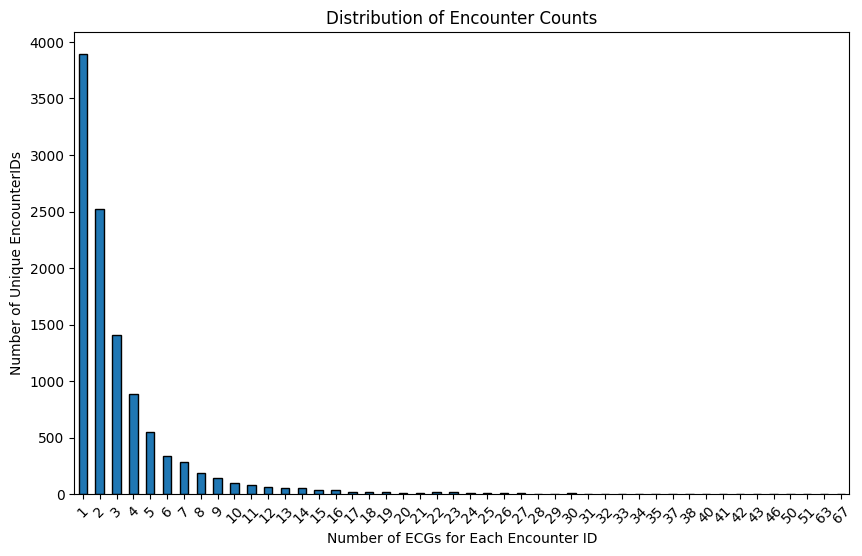

In [59]:
# Look at head of df
display(df_ecg.head(10))

# Proportion of patients with unique encounter ID
total_observations =  df_ecg.shape[0]
icu_observations = df_ecg['uniqueEncId'].notna().sum()
percentage_with_encounter_id = icu_observations / df_ecg.shape[0] * 100

print(f"Total observations: {total_observations}")
print(f"Observations with an encounter ID (ICU): {icu_observations}")
print(f"Percentage of observations with a unique encounter ID: {percentage_with_encounter_id:.2f}%")


def encounter_counts_plot(df):
    """
    Plots a histogram where the x-axis represents the number of rows for each unique EncounterID
    and the y-axis represents how many unique EncounterIDs have that number of rows.

    Parameters:
    df (pandas.DataFrame): The dataframe containing the 'EncounterID' column.
    """
    # Count the occurrences of each EncounterID using value_counts()
    encounter_counts = df['uniqueEncId'].value_counts()

    # Count how many EncounterIDs have the same number of rows
    encounter_frequency = encounter_counts.value_counts()

    # Plot the histogram
    plt.figure(figsize=(10, 6))
    encounter_frequency.sort_index().plot(kind='bar', edgecolor='black')
    plt.title('Distribution of Encounter Counts')
    plt.xlabel('Number of ECGs for Each Encounter ID')
    plt.ylabel('Number of Unique EncounterIDs')
    plt.xticks(rotation=45)
    plt.show()

# Call the function with your dataframe
encounter_counts_plot(df_ecg)

